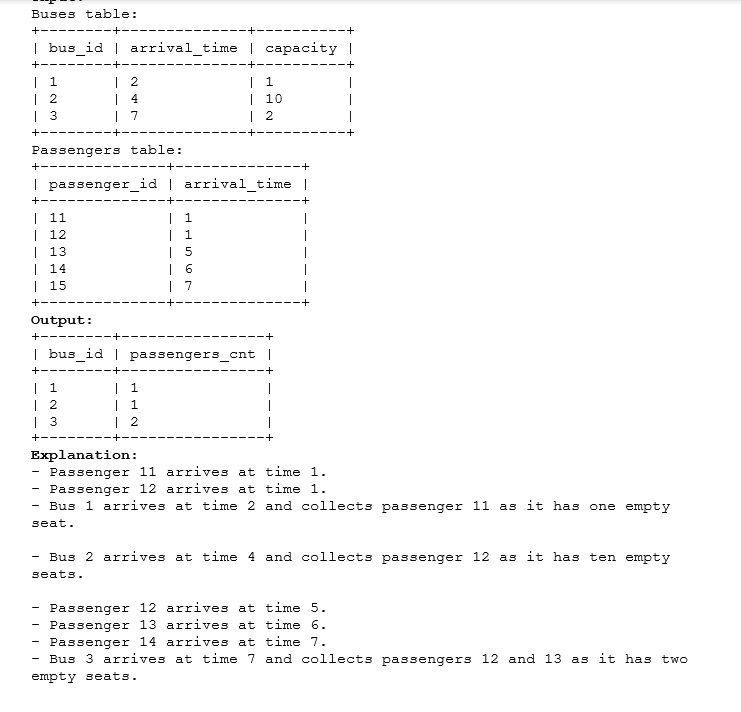

In [11]:
import pandas as pd

# Data for the bus table
bus_data = {
    'bus_id': [1, 2, 3],
    'arrival_time': [2, 4, 7],
    'capacity': [1, 10, 2]
}

# Data for the passengers table
passenger_data = {
    'passenger_id': [11, 12, 13, 14, 15],
    'arrival_time': [1, 1, 5, 6, 7]
}

# Create DataFrames
bus_df = pd.DataFrame(bus_data)
passengers_df = pd.DataFrame(passenger_data)

# Display the DataFrames
print("Bus DataFrame:")
print(bus_df)

print("\nPassengers DataFrame:")
print(passengers_df)


Bus DataFrame:
   bus_id  arrival_time  capacity
0       1             2         1
1       2             4        10
2       3             7         2

Passengers DataFrame:
   passenger_id  arrival_time
0            11             1
1            12             1
2            13             5
3            14             6
4            15             7


In [12]:
def find_table(bus_df, passengers_df):
    results = []  # List to store results

    # Iterate through each bus row
    for _, bus_row in bus_df.iterrows():
        passenger_count = 0  # Keep track of how many passengers have boarded this bus
        capacity = bus_row["capacity"]  # Get initial capacity
        
        # Filter passengers who can board this bus
        eligible_passengers = passengers_df[
            (passengers_df["arrival_time"] <= bus_row["arrival_time"])
        ]
        
        # Limit to the bus capacity
        passenger_count = min(capacity, len(eligible_passengers))
        
        # Update capacity of the bus
        #remaining_capacity = capacity - passenger_count
        
        # Add the result for this bus to the results list
        results.append({"bus_id": bus_row["bus_id"], "passengers_cnt": passenger_count})
        
        # Update the passengers_df to remove the ones who boarded
        passengers_df = passengers_df.iloc[passenger_count:]

    # Create result DataFrame from the results list
    result_df = pd.DataFrame(results)

    print(result_df)
    
find_table(bus_df, passengers_df)

   bus_id  passengers_cnt
0       1               1
1       2               1
2       3               2
